<a href="https://colab.research.google.com/github/Dominique2021/Assignment-2.1-Data-Cleaning-with-EDA-with-Time-Series-Data/blob/main/Cleaning_%26_EDA_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#use this cell to import additional libraries or define helper functions
import datetime

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [3]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [6]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [8]:
#create your Datetime column
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'Datetime': ['Date', 'Time']}, 
                 infer_datetime_format=True, low_memory=False, na_values=['?'])



In [9]:
#convert all data columns to numeric types
df.describe(datetime_is_numeric = True)

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [10]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [11]:
df.dtypes

Datetime                 datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Date                             object
Time                             object
dtype: object

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [12]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2.049280e+06
mean,.4f,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.458447e+00
min,.4f,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.000000e+00
25%,.4f,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.000000e+00
50%,.4f,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.000000e+00
75%,.4f,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,1.700000e+01
max,.4f,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,3.100000e+01
std,nan,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.437154e+00


Those row counts look a little funky. Let's visualize our missing data.

<AxesSubplot:>

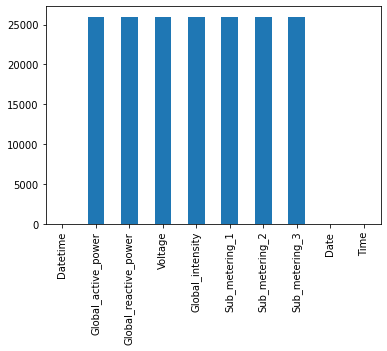

In [13]:
df.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

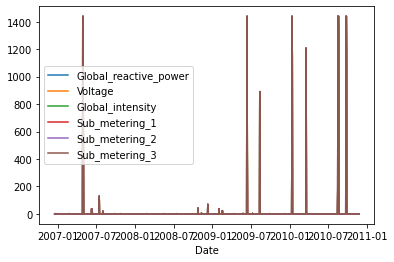

In [14]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot('Date', df_na.columns[3:-1])

**Q: What do you notice about the pattern of missing data?**

A: The missing data spikes around the same date 07/2007.

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: We could use deletion to deal with the missing data. This approach eliminates any rows or columns containing missing data. This might result in the loss of vital information, especially if there are a high number of missing data, despite being a basic and easy strategy.

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [15]:
#clean up missing data here
df = df.ffill()


In [16]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2.075259e+06
mean,.4f,1.0862,0.1233,240.8416,4.6042,1.1110,1.2880,6.416570e+00
min,.4f,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.000000e+00
25%,.4f,0.3080,0.0480,239.0000,1.4000,0.0000,0.0000,0.000000e+00
50%,.4f,0.5980,0.1000,241.0200,2.6000,0.0000,0.0000,1.000000e+00
75%,.4f,1.5240,0.1940,242.8700,6.4000,0.0000,1.0000,1.700000e+01
max,.4f,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,3.100000e+01
std,nan,1.0532,0.1125,3.2356,4.4268,6.1159,5.7869,8.419505e+00


## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the raw (untransformed) data.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I chose the variables Global active power, Global reactive power, Voltage, and Time because not only are they the most descriptive, but they also appear to have a significant impact in determining power usage for this experiment.

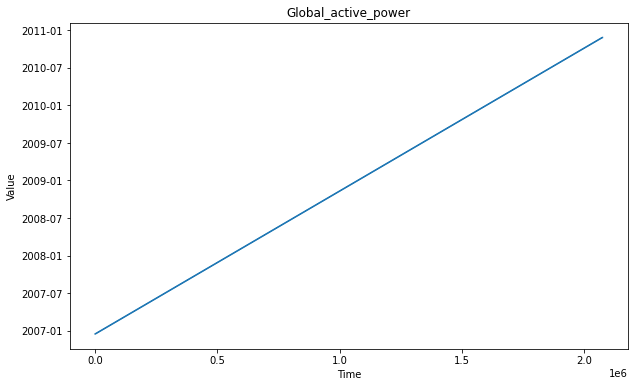

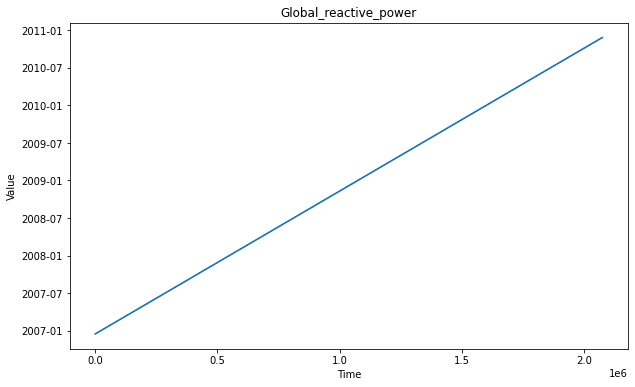

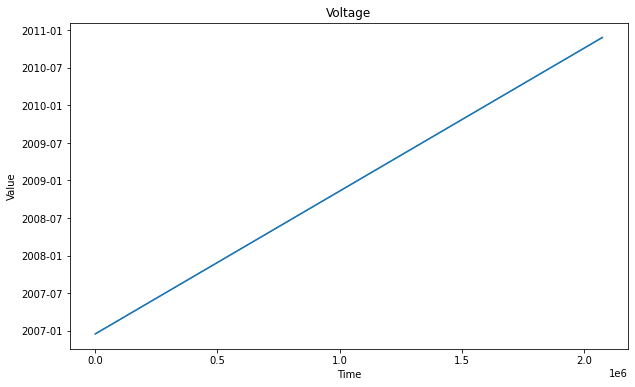

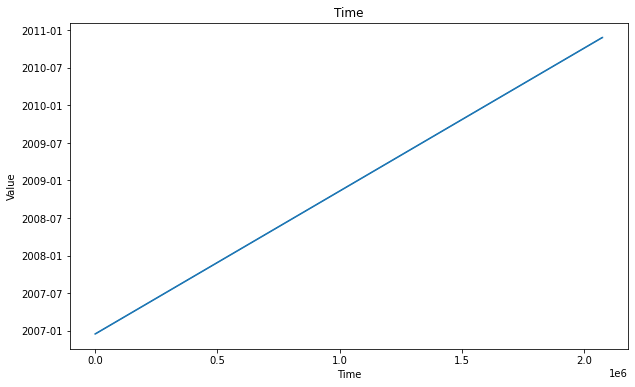

In [18]:
#build your line chart here
# Choose four variables to visualize over time
variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Time']

# Create a line chart for each variable
for variable in variables:
    plt.figure(figsize=(10,6))
    plt.plot(df['Date'])
    plt.title(variable)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A:

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [23]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper

df.set_index('Datetime', inplace=True)



KeyError: ignored

In [24]:

monthly_averages = df.resample('M').mean()

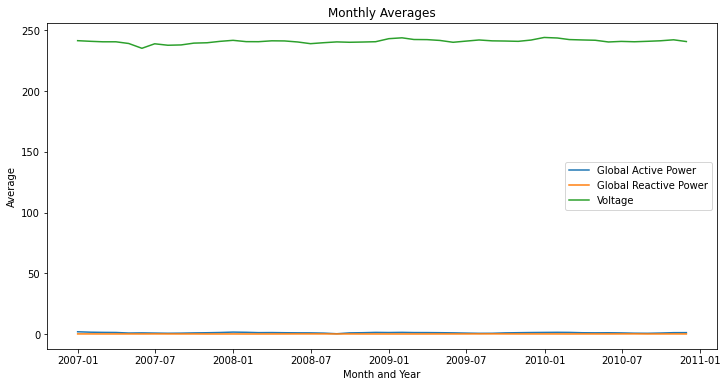

In [25]:
# Plot monthly averages
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(monthly_averages.index, monthly_averages['Global_active_power'], label='Global Active Power')
ax.plot(monthly_averages.index, monthly_averages['Global_reactive_power'], label='Global Reactive Power')
ax.plot(monthly_averages.index, monthly_averages['Voltage'], label='Voltage')
ax.legend()
ax.set_xlabel('Month and Year')
ax.set_ylabel('Average')
ax.set_title('Monthly Averages')
plt.show()



KeyError: ignored

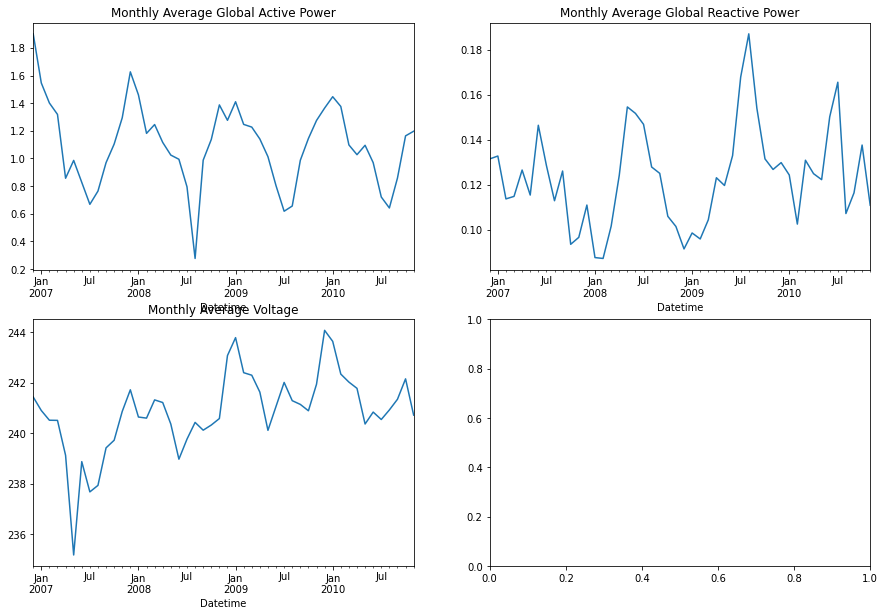

In [28]:
#build your linechart here
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

monthly_averages['Global_active_power'].plot(ax=axes[0, 0])
axes[0, 0].set_title('Monthly Average Global Active Power')

monthly_averages['Global_reactive_power'].plot(ax=axes[0, 1])
axes[0, 1].set_title('Monthly Average Global Reactive Power')

monthly_averages['Voltage'].plot(ax=axes[1, 0])
axes[1, 0].set_title('Monthly Average Voltage')

monthly_averages['Date'].plot(ax=axes[1, 1])
axes[1, 1].set_title('Monthly Average Time')

plt.tight_layout()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: I noticed that as global active power goes down global reactive power goes down. 

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above.**

In [29]:
#compute your moving average here

df['Global_active_power_30D'] = df['Global_active_power'].rolling(window=30).mean()



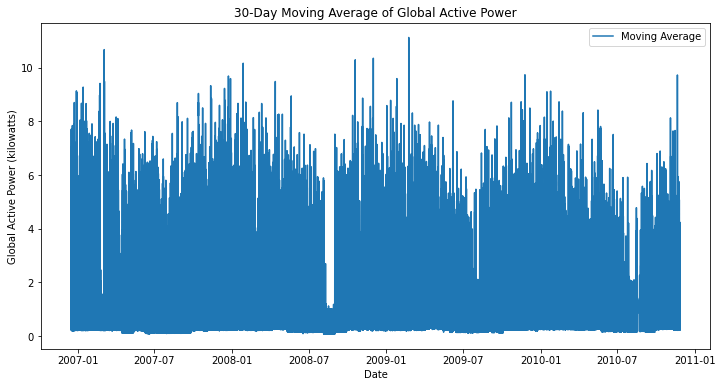

In [32]:
#build your line chart on the moving average here

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index, df['Global_active_power'], label='Moving Average')
ax.set_xlabel('Date')
ax.set_ylabel('Global Active Power (kilowatts)')
ax.set_title('30-Day Moving Average of Global Active Power')
ax.legend()
plt.show()


**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A:The 30 day moving advrage is a better way to display the data because it gives us a more detailed snapshot of the data. It is harder to see the finer details so more cleaning may have to be done.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

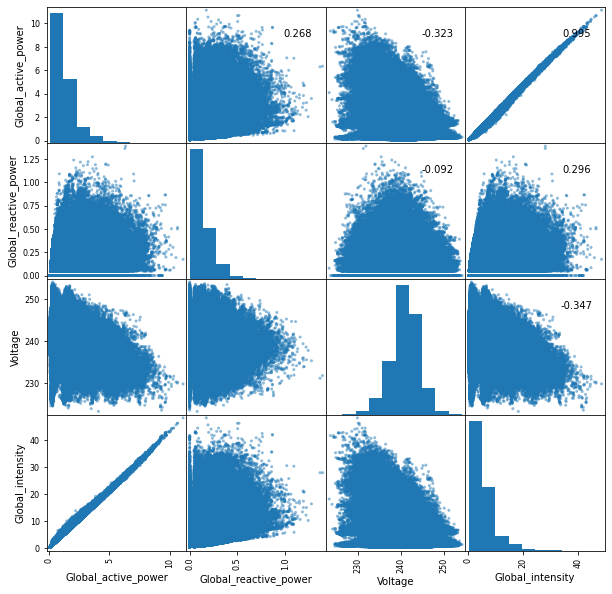

In [34]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: I see a correlation in the voltage vareable and the other variable. The more power being consumed the higher the Global-reactive-power demand is. I also noticed that both Global_intensity and Global_Active_power seem to mirror each other.